In [1]:
# https://machinelearningmastery.com/random-forest-ensemble-in-python/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
print(sklearn.__version__)
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

import scikitplot

1.0.2


In [3]:
depev_data = pd.read_csv('depev_final.csv')
depev_data.drop(depev_data.columns[depev_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
depev_data.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,INTV_QRT,WTFA_A,WTIA_A,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,2,2,1,2,3,1,1,13177.008,7601.336,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,2,2,2,2,1,1,1,6140.552,3344.434,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,2,2,1,1,3,1,1,9191.061,6949.498,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,2,2,2,1,2,1,1,7900.035,6446.327,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,1,1,1,1,4,1,1,10875.772,8646.586,1.13


In [4]:
depev_data.shape

(31959, 163)

We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

In [5]:
depev_data = depev_data.sample(frac=1)

train = depev_data.sample(frac=0.8)
print('Train:' + str(train.shape))

test = depev_data.sample(frac=0.2)
print('Test:' + str(test.shape))

Train:(25567, 163)
Test:(6392, 163)


In [6]:
X = train.drop(['DEPEV_A'], axis=1)
y = train[['DEPEV_A']].to_numpy()
X_test = test.drop(['DEPEV_A'], axis=1)
y_test = test[['DEPEV_A']].to_numpy()

In [7]:
model = RandomForestClassifier(n_estimators=100)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, np.ravel(y), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.921 (0.005)


In [8]:
# test and predict
model.fit(X, np.ravel(y))

yhat = model.predict(X_test)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [9]:
model.score(X_test, y_test)

0.9838861076345432

In [10]:
# model.estimators_
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=133571923)

In [11]:
full_columns = []
for (columnName, columnData) in X.iteritems(): # iterate through column names
        full_columns.append(columnName)
# print(full_columns)

In [12]:
label = 'DEPEV_A'

[Text(0.4141120479557537, 0.9833333333333333, 'DEPMED_A <= 1.5\ngini = 0.292\nsamples = 10081\nvalue = [2807, 13152, 21]\nclass = E'),
 Text(0.0848373795147352, 0.95, 'ANXFREQ_A <= 2.5\ngini = 0.252\nsamples = 1079\nvalue = [1486, 251, 6]\nclass = D'),
 Text(0.039348133170839794, 0.9166666666666666, 'PHQ81_A <= 1.5\ngini = 0.179\nsamples = 661\nvalue = [965, 104, 2]\nclass = D'),
 Text(0.007949257699977843, 0.8833333333333333, 'DENNG12M_A <= 1.5\ngini = 0.247\nsamples = 238\nvalue = [332, 56, 0]\nclass = D'),
 Text(0.002658985153999557, 0.85, 'POVRATTC_A <= 0.115\ngini = 0.018\nsamples = 65\nvalue = [107, 1, 0]\nclass = D'),
 Text(0.0017726567693330379, 0.8166666666666667, 'NATUSBORN_A <= 1.5\ngini = 0.444\nsamples = 2\nvalue = [2, 1, 0]\nclass = D'),
 Text(0.0008863283846665189, 0.7833333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = E'),
 Text(0.002658985153999557, 0.7833333333333333, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0]\nclass = D'),
 Text(0.00354531353866607

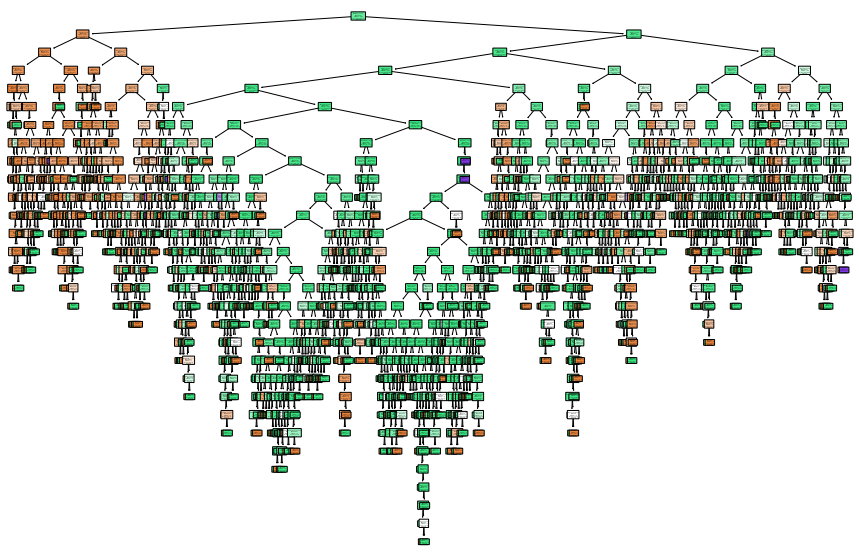

In [13]:
# https://towardsdatascience.com/4-ways-to-visualize-individual-decision-trees-in-a-random-forest-7a9beda1d1b7

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=full_columns,
          class_names=label, 
          filled=True, impurity=True, 
          rounded=True)

In [14]:
fig.savefig('figure_name.png')

We test this on 31 key characteristics:

In [15]:
key_char = pd.read_csv('key_characteristics.csv')
key_char.drop(key_char.columns[key_char.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
key_char.head()

,URBRRL,RATCAT_A,INCGRP_A,FAMINCTC_A,RACEALLP_A,BMICAT_A,WEIGHTLBTC_A,HEIGHTTC_A,PCNTTC,NOTCOV_A,...,MARITAL_A,SMKEV_A,LASTDR_A,PAYBLL12M_A,DIBEV_A,PREDIB_A,CANEV_A,ASEV_A,POVRATTC_A,DEPEV_A
0,4,9,3,60000,2,3,201,71,3,2,...,1,2,1,2,2,2,2,2,2.96,2
1,4,9,3,50000,1,2,130,62,2,2,...,1,1,1,2,2,2,2,2,2.97,2
2,4,12,3,65000,1,3,215,74,2,2,...,1,2,1,2,2,1,1,2,4.28,2
3,4,14,5,120000,8,4,290,72,2,2,...,1,2,1,2,2,2,2,2,7.13,2
4,1,4,1,30000,1,4,290,72,4,2,...,1,1,1,1,1,1,2,1,1.13,1


In [32]:
key_char = key_char.sample(frac=1)

train2 = key_char.sample(frac=0.8)
print('Train:' + str(train2.shape))

test2 = key_char.sample(frac=0.2)
print('Test:' + str(test2.shape))

Train:(25567, 31)
Test:(6392, 31)


In [17]:
X2 = train2.drop(['DEPEV_A'], axis=1)
y2 = train2[['DEPEV_A']].to_numpy()
X2_test = test2.drop(['DEPEV_A'], axis=1)
y2_test = test2[['DEPEV_A']].to_numpy()

In [33]:
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X2, np.ravel(y2), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.837 (0.004)


In [34]:
model.fit(X2, np.ravel(y2))

yhat = model.predict(X2_test)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [35]:
model.score(X2_test, y2_test)
# 0.916 50/50 train/test split
# 0.916 80/20 train/test split

0.9156445556946182

In [21]:
phq = pd.read_csv('phq.csv')
phq.drop(phq.columns[phq.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
phq.head()

,PHQ88_A,PHQ87_A,PHQ86_A,PHQ85_A,PHQ84_A,PHQ83_A,PHQ82_A,PHQ81_A,DEPEV_A
0,1,1,1,1,1,1,1,1,2
1,1,2,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1,1,2
3,1,1,1,1,1,2,1,1,2
4,1,4,2,2,3,2,3,4,1


In [27]:
# 80/20 train/test split improves slightly
phq = phq.sample(frac=1)

train3 = phq.sample(frac=0.8)
print('Train:' + str(train3.shape))

test3 = phq.sample(frac=0.2)
print('Test:' + str(test3.shape))

Train:(25567, 9)
Test:(6392, 9)


In [28]:
X3 = train3.drop(['DEPEV_A'], axis=1)
y3 = train3[['DEPEV_A']].to_numpy()
X3_test = test3.drop(['DEPEV_A'], axis=1)
y3_test = test3[['DEPEV_A']].to_numpy()

In [42]:
model = RandomForestClassifier(n_estimators=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X3, np.ravel(y3), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.850 (0.005)


In [43]:
model.fit(X3, np.ravel(y3))

yhat = model.predict(X3_test)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [44]:
model.score(X3_test, y3_test)
# 0.894 with no estimators specified
# 0.891 with n_estimators=10

0.8906445556946183

In [48]:
full_columns3 = []
for (columnName, columnData) in X3.iteritems(): # iterate through column names
        full_columns3.append(columnName)
# print(full_columns3)

['PHQ88_A', 'PHQ87_A', 'PHQ86_A', 'PHQ85_A', 'PHQ84_A', 'PHQ83_A', 'PHQ82_A', 'PHQ81_A']


[Text(0.44887218186995603, 0.9772727272727273, 'PHQ81_A <= 1.5\ngini = 0.285\nsamples = 16149\nvalue = [4372, 21175, 20]\nclass = E'),
 Text(0.22705549885386275, 0.9318181818181818, 'PHQ87_A <= 1.5\ngini = 0.185\nsamples = 12997\nvalue = [2110, 18453, 11]\nclass = E'),
 Text(0.12464864026446407, 0.8863636363636364, 'PHQ86_A <= 1.5\ngini = 0.162\nsamples = 12214\nvalue = [1713, 17630, 4]\nclass = E'),
 Text(0.07321780396317205, 0.8409090909090909, 'PHQ82_A <= 1.5\ngini = 0.141\nsamples = 11587\nvalue = [1395, 16952, 4]\nclass = E'),
 Text(0.03236180047739931, 0.7954545454545454, 'PHQ84_A <= 1.5\ngini = 0.122\nsamples = 11068\nvalue = [1137, 16394, 4]\nclass = E'),
 Text(0.009510097374303793, 0.75, 'PHQ83_A <= 1.5\ngini = 0.089\nsamples = 8208\nvalue = [611, 12435, 1]\nclass = E'),
 Text(0.004546660099268745, 0.7045454545454546, 'PHQ88_A <= 3.0\ngini = 0.08\nsamples = 7222\nvalue = [481, 11038, 1]\nclass = E'),
 Text(0.00394043875269958, 0.6590909090909091, 'PHQ88_A <= 1.5\ngini = 0.08\n

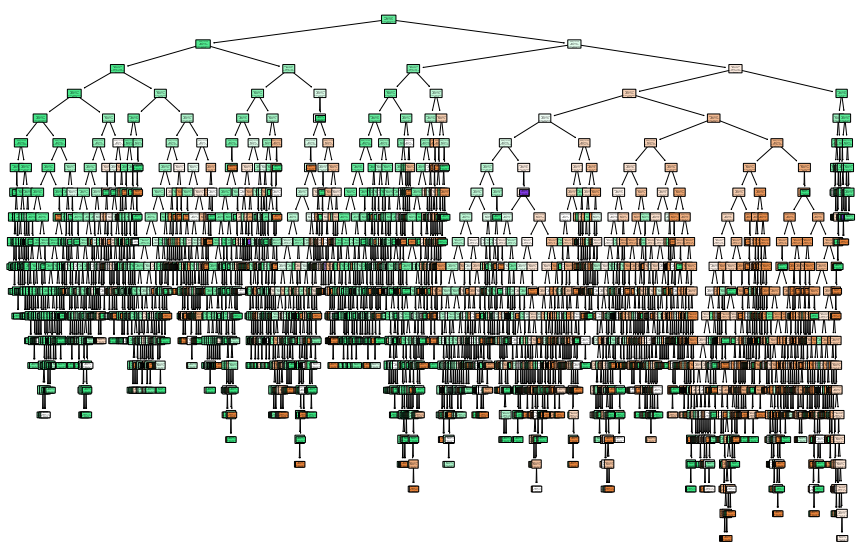

In [46]:
fig3 = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=full_columns3,
          class_names=label, 
          filled=True, impurity=True, 
          rounded=True)

In [47]:
fig.savefig('phq_decision_tree.png')